### 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(233)
x = np.random.uniform(-4, 2, size = (100))
y = x ** 2 + 4 * x + 3 + 2 * np.random.randn(100)

X = x.reshape(-1, 1)

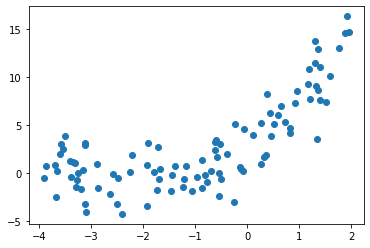

In [3]:
plt.scatter(x,y)
plt.show()

### 线性回归和多项式回归

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Degree: 1 Score: 0.5273556058762796
Degree: 2 Score: 0.7961121480231473
Degree: 5 Score: 0.802124730174001
Degree: 20 Score: 0.8358688138591097


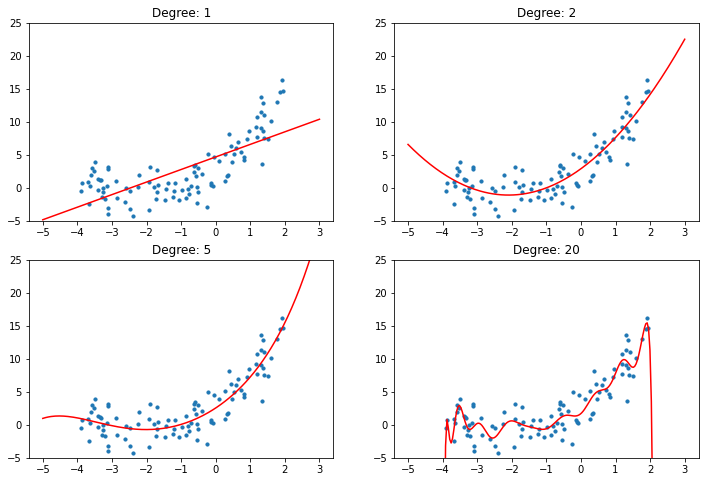

In [5]:
plt.rcParams["figure.figsize"] = (12, 8)

degrees = [1, 2, 5, 20]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    X_poly = polynomial_features.fit_transform(X)

    linear_regression = LinearRegression()
    linear_regression.fit(X_poly, y)

    X_new = np.linspace(-5, 3, 200).reshape(-1, 1)
    X_new_poly = polynomial_features.fit_transform(X_new)
    y_predict = linear_regression.predict(X_new_poly)
    
    plt.subplot(2, 2, i + 1)
    plt.title("Degree: {0}".format(degree))
    plt.scatter(x, y, s = 10)
    plt.ylim(-5, 25)
    plt.plot(X_new, y_predict, color = "red")

    print("Degree:", degree, "Score:", linear_regression.score(X_poly, y))

plt.show()

### 划分数据集

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70,), (30,), (70,), (30,))

### 学习曲线

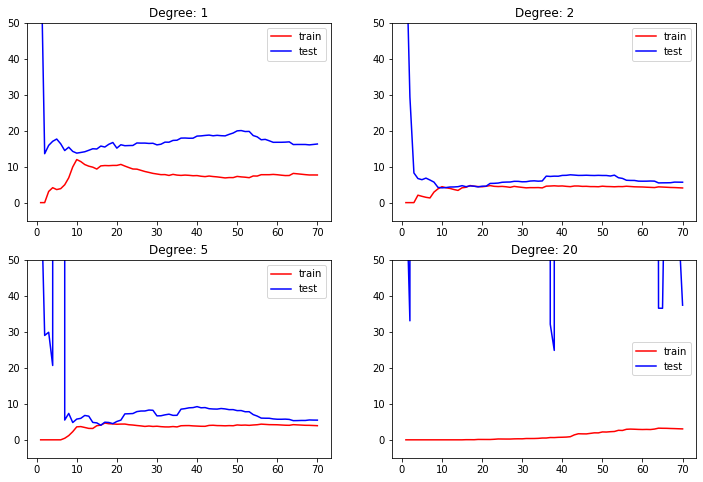

In [8]:
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (12, 8)

degrees = [1, 2, 5, 20]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    
    X_poly_train = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    X_poly_test = polynomial_features.fit_transform(x_test.reshape(-1, 1))
    
    train_error, test_error = [], []
    for k in range(len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(X_poly_train[:k + 1], y_train[:k + 1])

        y_train_pred = linear_regression.predict(X_poly_train[:k + 1])
        train_error.append(mean_squared_error(y_train[:k + 1], y_train_pred))

        y_test_pred = linear_regression.predict(X_poly_test)
        test_error.append(mean_squared_error(y_test, y_test_pred))
    
    plt.subplot(2, 2, i + 1)
    plt.title("Degree: {0}".format(degree))
    plt.ylim(-5, 50)
    plt.plot([k + 1 for k in range(len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

plt.show()

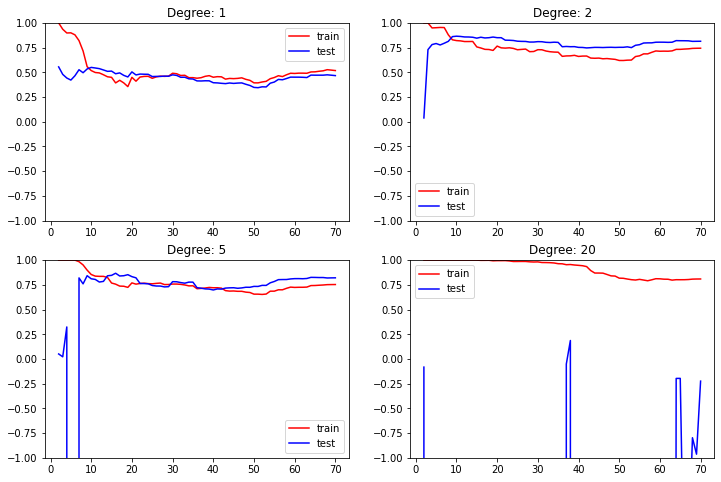

In [9]:
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (12, 8)

degrees = [1, 2, 5, 20]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    
    X_poly_train = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    X_poly_test = polynomial_features.fit_transform(x_test.reshape(-1, 1))
    
    train_error, test_error = [], []
    for k in range(1, len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(X_poly_train[:k + 1], y_train[:k + 1])

        train_error.append(linear_regression.score(X_poly_train[:k + 1], y_train[:k + 1]))
        test_error.append(linear_regression.score(X_poly_test, y_test))
    
    plt.subplot(2, 2, i + 1)
    plt.title("Degree: {0}".format(degree))
    plt.ylim(-1, 1)
    plt.plot([k + 1 for k in range(1, len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(1, len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

plt.show()